Simple Linear Regression:

Step 1: load all necessary libraries and datasets using the pandas library.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.metrics import classification_report
insurance=pd.read_csv('../ML/Linear Regression/new_insurance_data.csv') 
insurance.sample(5)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
31,19.0,male,22.610,0.0,no,12562.37053,9.0,729237.0,1.019411e+06,0.0,7.109737e+06,northwest,1628.47090
922,61.0,female,21.090,0.0,no,57352.76515,16.0,946429.0,2.887669e+06,1.0,2.611371e+08,northwest,13415.03810
181,24.0,female,33.345,0.0,no,38079.82321,2.0,810609.0,9.548924e+06,1.0,6.787099e+07,northwest,2855.43755
312,34.0,male,21.375,0.0,no,11964.74436,4.0,846451.0,2.222824e+06,1.0,5.955197e+07,northeast,4500.33925
470,38.0,female,27.265,1.0,no,37651.45400,21.0,892470.0,1.001268e+07,1.0,6.333859e+07,northeast,6555.07035


Step 2: Check for null values, shape, and features datatype of variables:

In [112]:
# checks for non-null entries, size and datatype
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [113]:
insurance.isnull().sum()
# helps me to check for null values

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

##### Step 3. Fill in missing values: 
We can fill in missing values of object type features using mode and integer type features using mean or median.

In [114]:
# calculating mode for object data type features which will be used to fill missing values.
# We have 3 features which are of object type
print(f"mode of sex feature: {insurance['sex'].mode()[0]}")
print(f"mode of region feature: {insurance['region'].mode()[0]}")
print(f"mode of smoker feature: {insurance['smoker'].mode()[0]}")

mode of sex feature: male
mode of region feature: southeast
mode of smoker feature: no


In [115]:
# describe() function will give the descriptive statistics for all numerical features
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1329.0,3.931001e+01,1.403482e+01,1.800000e+01,2.700000e+01,3.900000e+01,5.100000e+01,6.400000e+01
bmi,1335.0,3.066511e+01,6.101690e+00,1.596000e+01,2.630250e+01,3.040000e+01,3.468750e+01,5.313000e+01
children,1333.0,1.090773e+00,1.201856e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Claim_Amount,1324.0,3.336133e+04,1.561729e+04,1.920136e+03,2.076886e+04,3.370031e+04,4.505233e+04,7.727799e+04
past_consultations,1332.0,1.521622e+01,7.467723e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.000000e+01,4.000000e+01
num_of_steps,1335.0,9.100047e+05,9.188612e+04,6.954300e+05,8.471995e+05,9.143000e+05,9.716840e+05,1.107872e+06
Hospital_expenditure,1334.0,1.584179e+07,2.669305e+07,2.945253e+04,4.077633e+06,7.490337e+06,1.084082e+07,2.616317e+08
NUmber_of_past_hospitalizations,1336.0,1.060629e+00,5.335831e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Anual_Salary,1332.0,3.696849e+08,5.668843e+08,2.747072e+06,7.701932e+07,1.419361e+08,3.243499e+08,4.117197e+09
charges,1338.0,1.327042e+04,1.211001e+04,1.121874e+03,4.740287e+03,9.382033e+03,1.663991e+04,6.377043e+04


We see that for numerical features, mean and median are almost same. Therefore, now we will replace null values of numerical features with their median and null values of categorical variable with their mode.

In [116]:
for col_name in list(insurance.columns):
    if insurance[col_name].dtypes=='object':
        # filling null values with mode for object type features
        insurance[col_name] = insurance[col_name].fillna(insurance[col_name].mode()[0])
    else:
        # filling null values with mean for numeric type features
        insurance[col_name] = insurance[col_name].fillna(insurance[col_name].median())
# Now the null count for each feature is zero
print("After filling null values:")
print(insurance.isna().sum())

After filling null values:
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


Step 4:  Outlier Analysis 
We will plot box plot for all numerical features except the target variable charges.

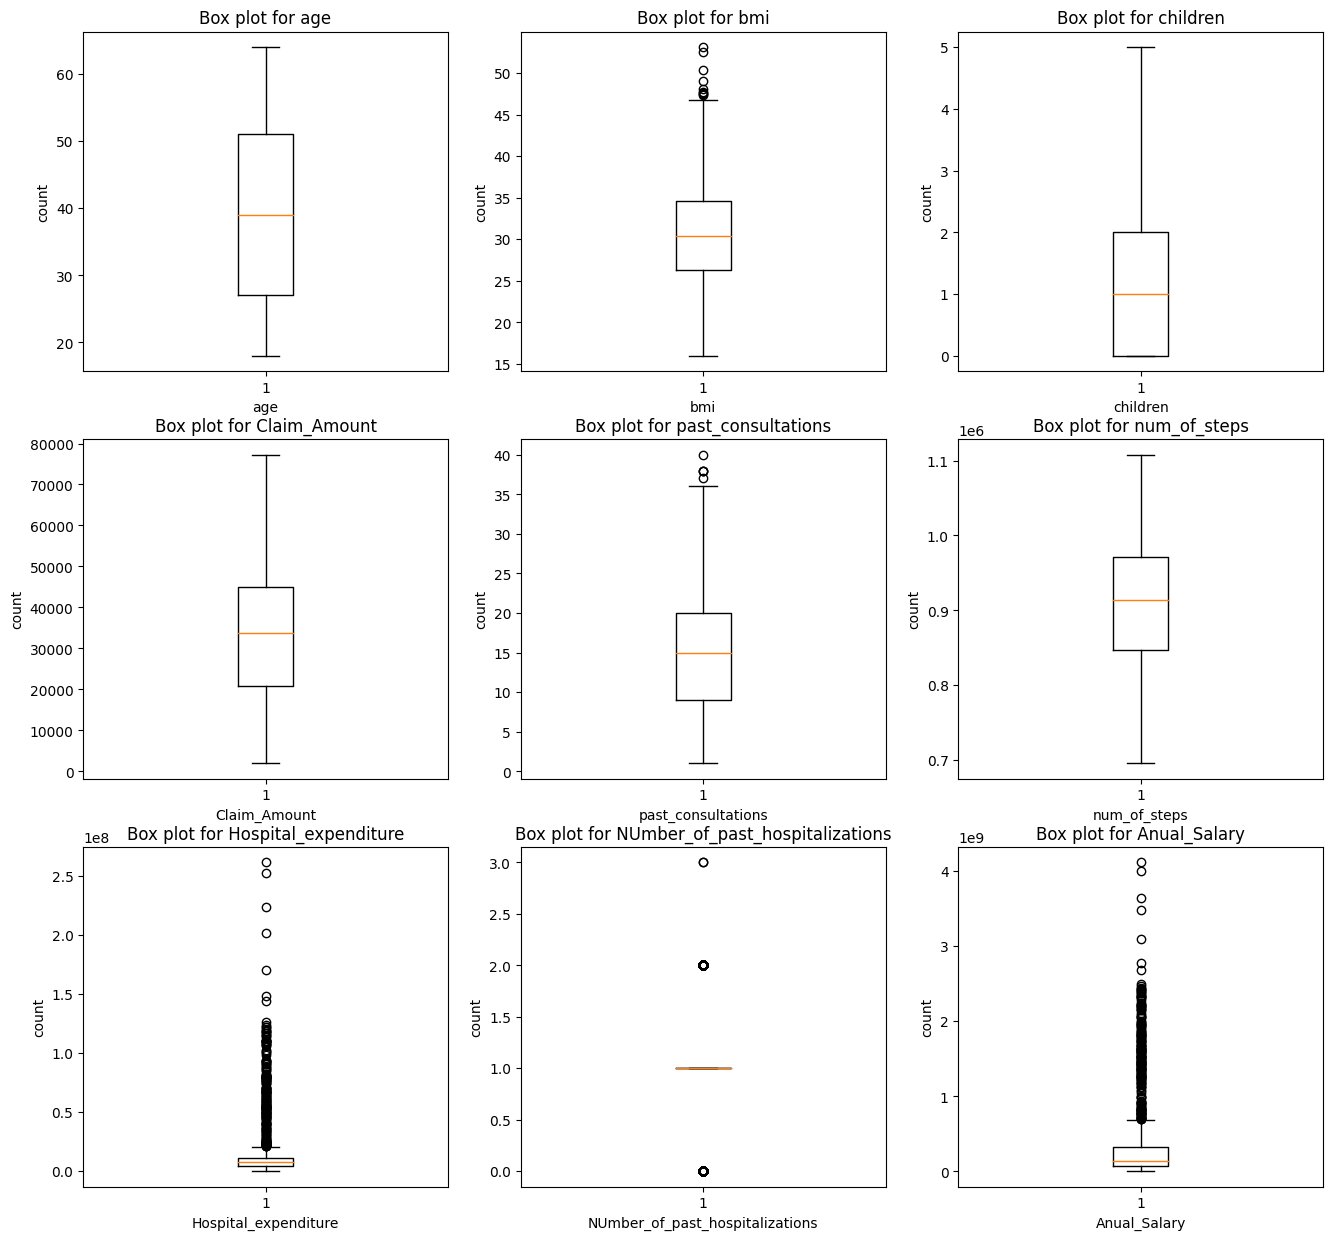

In [117]:

i = 1
plt.figure(figsize=(16,15))
for col_name in list(insurance.columns):
    # total 9 box plots will be plotted, therefore 3*3 grid is taken
    if((insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64') and col_name != 'charges'):
        plt.subplot(3,3, i)
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.title(f"Box plot for {col_name}")
        i += 1
plt.show()

In [118]:
outliers_features = ['bmi', 'Hospital_expenditure', 'Anual_Salary', 'past_consultations']
for col_name in outliers_features:
    Q3 = insurance[col_name].quantile(0.75)
    Q1 = insurance[col_name].quantile(0.25)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    prev_size = len(insurance)
    insurance = insurance[(insurance[col_name] >= lower_limit) & (insurance[col_name] <= upper_limit)]
    cur_size = len(insurance)
    print(f"dropped {prev_size - cur_size} rows for {col_name}  due to presence of outliers")

dropped 9 rows for bmi  due to presence of outliers
dropped 199 rows for Hospital_expenditure  due to presence of outliers
dropped 100 rows for Anual_Salary  due to presence of outliers
dropped 0 rows for past_consultations  due to presence of outliers


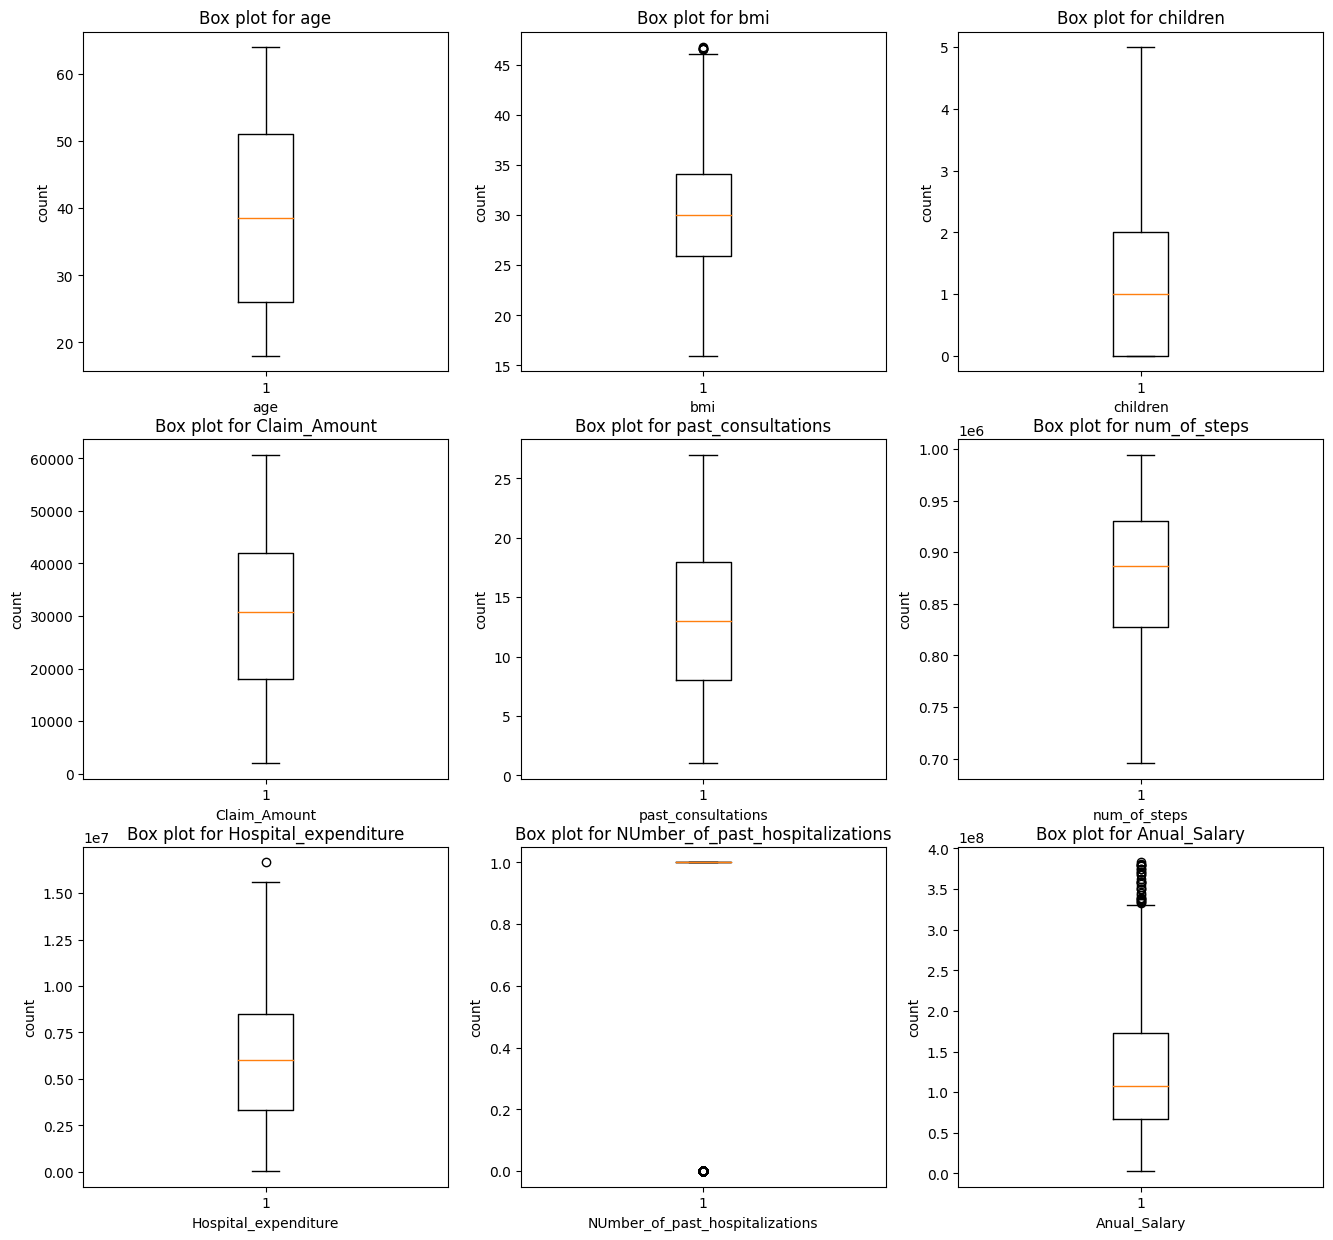

In [119]:

i = 1
plt.figure(figsize=(16,15))
for col_name in list(insurance.columns):
    # total 9 box plots will be plotted, therefore 3*3 grid is taken
    if((insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64') and col_name != 'charges'):
        plt.subplot(3,3, i)
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.title(f"Box plot for {col_name}")
        i += 1
plt.show()

Step 5: check for correlation:

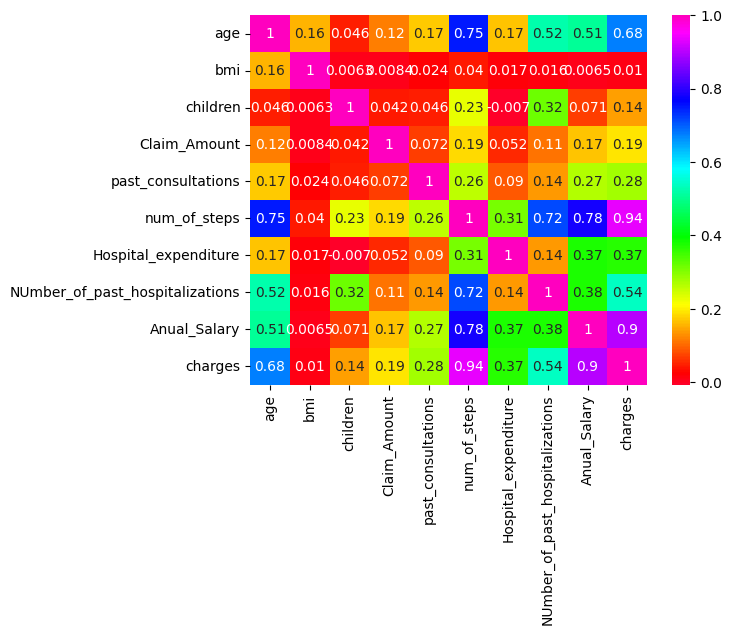

In [120]:
import seaborn as sns
sns.heatmap(insurance.corr(),cmap='gist_rainbow',annot=True)
plt.show()

We will check for multi-collinearity using variation inflation factor (VIF) for each feature. If VIF value is higher than 5 and it is said that their is multicollinearity inside dataset, therefore we will delete that feaure.

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
X = insurance[col_list]

X = insurance[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)


                           feature        VIF
0                              age  15.608958
1                              bmi  26.366792
2                         children   2.029059
3                     Claim_Amount   5.685160
4               past_consultations   6.257322
5                     num_of_steps  61.435128
6             Hospital_expenditure   5.324604
7  NUmber_of_past_hospitalizations  12.070695
8                     Anual_Salary   5.723023


In [122]:
# deleting num_of_steps feature
insurance.drop('num_of_steps', axis = 1, inplace= True)
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
X = insurance[col_list]

X = insurance[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)


                           feature        VIF
0                              age  14.636412
1                              bmi  12.356789
2                         children   2.016852
3                     Claim_Amount   5.250730
4               past_consultations   5.835804
5             Hospital_expenditure   5.034008
6  NUmber_of_past_hospitalizations  10.723083
7                     Anual_Salary   5.633486


In [123]:
# deleting age feature
insurance.drop('age', axis = 1, inplace= True)
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
X = insurance[col_list]

X = insurance[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)


                           feature        VIF
0                              bmi  10.365491
1                         children   1.978240
2                     Claim_Amount   5.238177
3               past_consultations   5.816717
4             Hospital_expenditure   5.032963
5  NUmber_of_past_hospitalizations   8.414445
6                     Anual_Salary   4.900730


In [124]:
# deleting bmi feature
insurance.drop('bmi', axis = 1, inplace= True)
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
X = insurance[col_list]

X = insurance[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)


                           feature       VIF
0                         children  1.976461
1                     Claim_Amount  4.549928
2               past_consultations  5.040029
3             Hospital_expenditure  4.567501
4  NUmber_of_past_hospitalizations  7.336623
5                     Anual_Salary  4.854536


Step 5: Seperating out the input features and target variable and split dataset into train and test data:

In [125]:
x=insurance.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure',
                    'NUmber_of_past_hospitalizations','Anual_Salary']]
y=insurance.loc[:,'charges']
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=0)
print("length of train dataset: ",len(x_train) )
print("length of test dataset: ",len(x_test) )

length of train dataset:  824
length of test dataset:  206


Step 6: Training Linear Regression model on train set and evaluatingit on test dataset:

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, recall_score, r2_score, f1_score, accuracy_score

model = LinearRegression()
# train the model
model.fit(x_train, y_train)
print("trained model coefficients:", model.coef_, " and intercept is: ", model.intercept_)
# model.intercept_ is b0 term in linear boundary equation, and model.coef_ is
#  the array of weights assigned to ['children','Claim_Amount','past_consultations','Hospital_expenditure',
#                    'NUmber_of_past_hospitalizations','Anual_Salary'] respectively

trained model coefficients: [4.96919880e+01 6.67939723e-03 2.40065010e+01 6.13866544e-05
 2.88284509e+03 4.26269219e-05]  and intercept is:  -1133.587049743479


C:\Users\artig\AppData\Local\Temp\ipykernel_13636\177261964.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error_pred['error'])


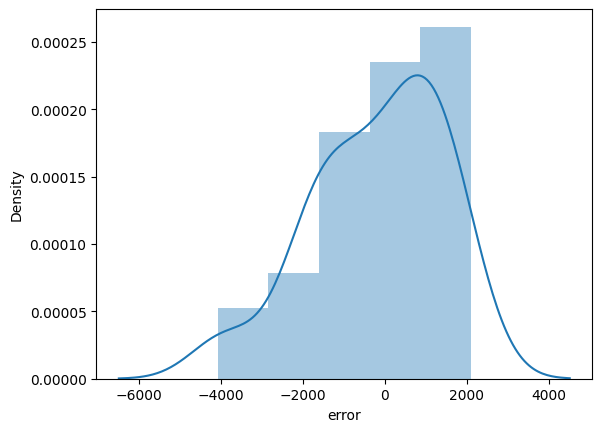

In [127]:
y_pred = model.predict(x_test)
error_pred=pd.DataFrame(columns={'Actual_data','Prediction_data'})
error_pred['Prediction_data'] = y_pred
error_pred['Actual_data'] = y_test
error_pred["error"] = y_test - y_pred
sns.distplot(error_pred['error'])
plt.show()

In [128]:
# check for model performance
print(f'r2 score of trained model: {r2_score(y_pred=y_pred, y_true= y_test)}')


r2 score of trained model: 0.8765966463203646


Text(0, 0.5, 'residula error')

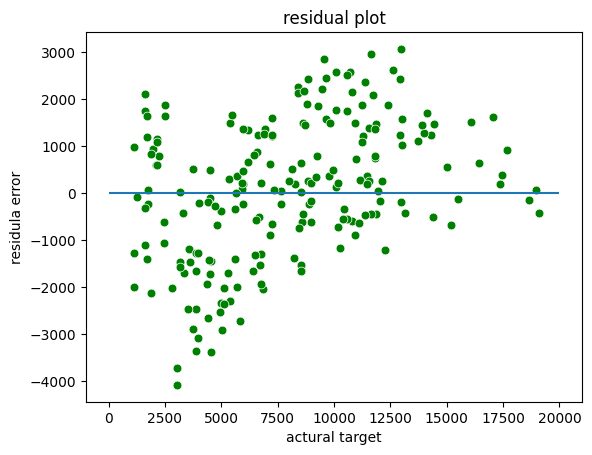

In [134]:
sns.scatterplot(x = y_test,y =  (y_test - y_pred), c = 'g', s = 40)
plt.hlines(y = 0, xmin = 0, xmax=20000)
plt.title("residual plot")
plt.xlabel("actural target")
plt.ylabel("residula error")